# generate 1D test data

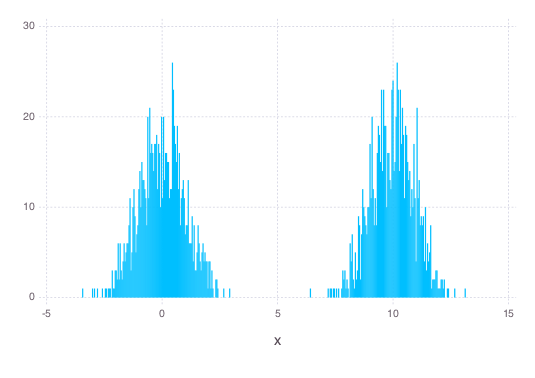

In [1]:
using Gadfly

N = 1000

X = randn(N)
Y = randn(N) + 10

plot(   layer(x = X, Geom.histogram),
layer(x = Y, Geom.histogram))

# construct SPN

In [108]:
#using SPN
include("../src/SPN.jl")

root = SPN.SumNode(0)

SPN.add!(root, SPN.UnivariateNode(fit(Normal, X)))
SPN.add!(root, SPN.UnivariateNode(fit(Normal, Y)))

SPN.normalize!(root);

SPN.order(root);

In [57]:
@time SPN.order(root)

elapsed time: 5.1297e-5 seconds (2176 bytes allocated)


3-element Array{SPNNode,1}:
 UnivariateNode(Normal(μ=-0.00487973535830186, σ=0.9919785582622547))                                                                                                            
 UnivariateNode(Normal(μ=9.975744818701033, σ=0.9357317420461839))                                                                                                               
 SumNode(0,SPNNode[UnivariateNode(Normal(μ=-0.00487973535830186, σ=0.9919785582622547)),UnivariateNode(Normal(μ=9.975744818701033, σ=0.9357317420461839))],[0.416354,0.583646],0)

In [112]:
SPN.llh(root, [5.0])
@time SPN.llh(root, [5.0])

elapsed time: 0.000151354 seconds (4464 bytes allocated)


1-element Array{Float64,1}:
 -14.5896

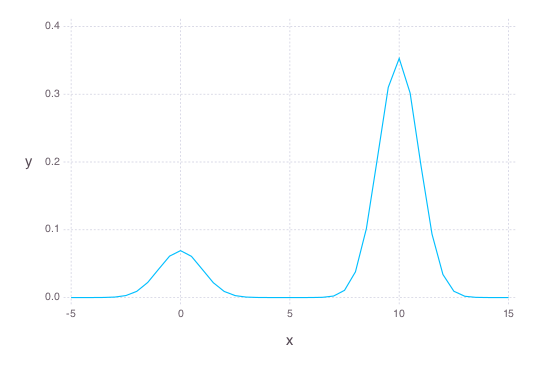

In [117]:
x = -5:0.5:15
p = zeros(length(x))

for i in 1:length(x)
    p[i] = SPN.llh(root, [x[i]])[1]
end

plot( x = x, y = exp(p), Geom.line )

# run EM code by Poon et al.